# Lesson - Statistics and Probability VII: Weighted Mean and the Median


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [2]:
# Explore AmesHousing1.txt dataset
houses = pd.read_csv('AmesHousing_1.txt', sep = '\t')
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
# mean house prices
mean = (houses['SalePrice'].mean())
mean

180796.0600682594

In [4]:
# mean prices by year
houses_per_year = pd.DataFrame(houses.groupby('Yr Sold')['SalePrice'].mean())   
houses_per_year

,SalePrice
Yr Sold,
2006,181761.648000
2007,185138.207493
2008,178841.750804
2009,181404.567901
2010,172597.598240


In [5]:
# Calculate mean basedon annual means
new_mean = houses_per_year.SalePrice.mean()
print(new_mean)
difference = mean - new_mean
print(difference)

179948.75448767154
847.3055805878539


In [6]:
# Houses sold per year
sold_per_yr = houses.groupby('Yr Sold').size()
houses_per_year['houses_sold'] = sold_per_yr
houses_per_year

,SalePrice,houses_sold
Yr Sold,,
2006,181761.648000,625
2007,185138.207493,694
2008,178841.750804,622
2009,181404.567901,648
2010,172597.598240,341


The reason why there is a difference between population mean and new_mean calculated from annual mean is because there is a difference in the number of houses sold per year. While calculating new_mean from annual mean we have given same weight to each year. 

To compute the correct overall mean, we need to:

- Find the sum of prices for each year individually. For instance, 341 houses were sold in 2010 and each house had an average price of approximately $172598. The sum of prices for year 2010 is: 

$$341 * 172\ 598 = 58\ 855\ 918$$


- Add all the sums together.
- Divide the final sum by the number of houses sold (not by the number of years) to find the mean sale price per house.

Below, we:

- Using only the data we have in the `houses_per_year data set`, compute the sum of prices for each year.
- Add all the sums together.
- Divide the final sum by the total number of houses sold. Assign the result to a variable named `weighted_mean`.
- Compute again the mean of the SalePrice column in the houses data set. Assign the value to a variable named `mean_original`.
- Round each mean value to 10 decimal places to get rid of minor rounding errors and then measure the difference between the two means. Assign the result to a variable named `difference`. If the two means are equal, you should get a difference of 0.

In [7]:
houses_per_year['sum_prices'] = houses_per_year['SalePrice'] * houses_per_year['houses_sold']
weighted_mean = round(houses_per_year['sum_prices'].sum() / houses_per_year['houses_sold'].sum(), 10)
mean_original = round(houses.SalePrice.mean(), 10)
difference = weighted_mean - mean_original
difference

0.0

### The Weighted Mean

When we take into account the different weights and compute the mean like we did above, we call that mean the **weighted mean**. 

Above, we compute the weighted mean for this distribution of sample means:
$$\begin{equation}
[ 181761.648, 185138.2074928, 178841.75080386, 181404.56790123, 172597.59824047]
\end{equation}$$

We multiplied each value by the number of houses sold in that year to take into account the different weights, then we summed up the products and divided by the total number of houses. This is the distribution of weights we used:
$$\begin{equation}
[625, 694, 622, 648, 341]
\end{equation}$$

Now if instead of the actual values, we have six unknown prices, which we'll abbreviate with x and six unknown corresponding weights which we'll abbreviate with w:

$$\begin{equation}
[x_1, x_2, x_3, x_4, x_5, x_6]
\end{equation}$$
$$\begin{equation}
[w_1, w_2, w_3, w_4, w_5, w_6]
\end{equation}$$

- To find the weighted mean, we need to:
- Multiply each x value (mean house price) by its corresponding weight value w (total number of houses sold)
- Add the products together 
- Divide the sum of the products by the sum of the weights (that is, the total number of houses sold) to get the weighted mean:
$$\begin{equation}
weighted\ mean = \frac{x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6}{w_1 + w_2 + w_3 + w_4 + w_5 + w_6}
\end{equation}$$

The equation above only works if we have six mean values and six weights. We can easily extend the equation, however, to account for any number of mean values and weights:
$$\begin{equation}
[x_1, x_2,\ ...\ , x_n]
\end{equation}

\begin{equation}
[w_1, w_2,\ ...\ , w_n]
\end{equation}

\begin{equation}
weighted\ mean = \frac{x_1w_1 + x_2w_2 +\ ...\ + x_nw_n}{w_1 + w_2 +\ ...\ + w_n}
\end{equation}$$

This is how the formula above would work if we had three mean values and three weights:

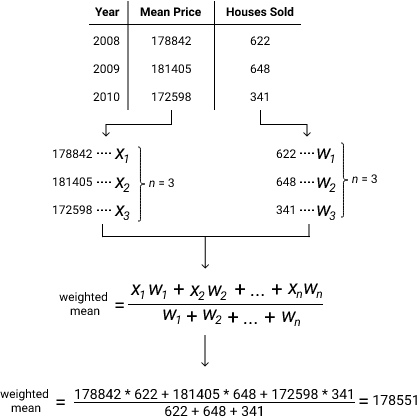

We can also represent weighted mean of a sample using sigma notation:
$$\begin{equation}
weighted\ mean = \frac{\displaystyle\sum_{i = 1}^{n}x_iw_i}{\displaystyle\sum_{i = 1}^{n}w_i}
\end{equation}$$

For a population, above notation becomes: 
$$\begin{equation}
\mu = \frac{\displaystyle\sum_{i = 1}^{N}x_iw_i}{\displaystyle\sum_{i = 1}^{N}w_i}
\end{equation}$$


Below, we will:
Write a function that computes the weighted mean for any array of numbers.

- The function should take in two arrays: one array containing the mean values, and another array with the corresponding weights.
- The function returns the weighted mean.
- Use the function to compute the weighted mean for the `Mean Price` column in the `houses_per_year` data set. Assign the result to a variable named `weighted_mean_function`.

- Use the `numpy.average()` function to compute the weighted mean for the same Mean Price column. Read the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.average.html) to figure out how to pass in the weights. Assign the result to a variable named `weighted_mean_numpy`.
- Compare the two weighted means (the one from function and the one from `np.average()`) using the `==` operator. Round each mean to 10 decimal places to get rid of minor rounding errors. Assign the result to a variable named `equal`.    

In [8]:
def weighted_mean (distribution, weights):
    weighted_sum = []
    for mean, weight in zip(distribution, weights): # zip iterates simultaneously over multiple arrays
        weighted_sum.append(mean*weight)
    return sum(weighted_sum)/ sum(weights)

weighted_mean_function = weighted_mean(houses_per_year.SalePrice, houses_per_year.houses_sold)

weighted_mean_numpy = np.average(a= houses_per_year.SalePrice, weights= houses_per_year.houses_sold)

equal = weighted_mean_function == weighted_mean_numpy
equal
    

True

### The Median for Open Ended Distributions

There are distributions, however, where it's impossible to compute the mean. Consider for instance the frequency distribution of the `TotRms AbvGrd` variable, which describes the number of rooms above ground:

In [9]:
print(houses['TotRms AbvGrd'].value_counts())

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64


The lowest boundary of the distribution is well-defined — the lowest value is 2 and no value in the distribution can be lower than that. But the upper boundary is not defined as precisely — the highest value is "10 or more" which means that houses can actually have 10, 11, 15, or even more rooms. The upper boundary ("10 or more") is thus open, and for this reason we say that the TotRms AbvGrd variable has an **open-ended distribution**.

A common workaround is to sort all the values in the distribution in an ascending order and then select the middle value as the most representative value of the distribution. Consider this sample of 5 values from the `TomRms AbvGrd` column:

$$\begin{equation}
[10\ or\ more,\ 5,\ 7,\ 7,\ 6]
\end{equation}$$

First, we need to order the values in an ascending order:

$$\begin{equation}
[5,\ 6,\ 7,\ 7,\ 10\ or\ more]
\end{equation}$$

This distribution has five values and the middle one is the third one because it divides the distribution in two halves of equal length. We call this middle value the median, so for this case the median is 7.

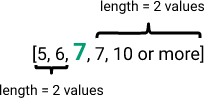

Below, we will:
- Compute the median for each of the three distributions we already defined in the code editor.
- Assign the median of distribution1 to a variable named median1.
- Assign the median of distribution2 to a variable named median2.
- Assign the median of distribution3 to a variable named median3.
- What is the median of the distribution [3, 7, 2, 12]

In [10]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

sorted(distribution2)
median1 = 23
median2 = 55
median3 = 32

### Distributions for Even number of Values
When a distribution has an even number of values, it's not clear which is the middle one. In such a case, the median is the mean of the two middle values. In the below given figure it is (7+7)/2 = 7
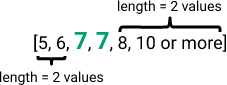

This value of 7 is the average value of the distribution above. In statistics, the term "average" refers to the most representative value of a distribution. Although it's common to use "average" and "mean" interchangeably, "average" is not restricted to refer only to the mean. Depending on the context, it can also refer to the median or the mode.

For the median, there's no widely accepted standard notation — most commonly, both the sample and the population median are simply denoted with the word median. 
Unlike the mean, the median doesn't have a neat way to be defined algebraically. This is because sorting a distribution in an ascending order and then choosing a middle value or two doesn't involve any arithmetic. The different treatment for odd and even-numbered distributions also poses some theoretical challenges for constructing a single definition.

Below, we will:

Find the median value of the `TotRms AbvGrd` column.

- Sort the values in the column in ascending order.

- Replace the '10 or more' value with the integer 10 using the `Series.replace()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html). We do this only for sorting purposes. 
- To avoid modifying the data in the original data set, make a copy of the column using the `Series.copy()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.copy.html) and save it to a distinct variable.
- Convert the column to the int type using the `Series.astype()` method.
- Sort the values in ascending order using the `Series.sort_values()` method.
- Depending on whether the distribution has an odd or even number of values, find the median and assign it to a variable named `median`.

In [11]:
# Sort values
rooms = houses['TotRms AbvGrd'].copy()
rooms = rooms.replace(to_replace = '10 or more', value = '10')
rooms = rooms.astype(int)
rooms_sorted = rooms.sort_values(ascending = True)
print(len(rooms_sorted)) # to determine whether even or odd

# Find median
middle_indices = [len(rooms_sorted)/2 -1, len(rooms_sorted)/2] # determine two middle indices; -1 as index starts from 0

middle_values = rooms_sorted.iloc[middle_indices]

median = middle_values.mean()
median


2930


6.0

### The Median as a Resistant Statistic

When we compute the mean, we account equally for each value in the distribution — we sum up all the values in the distribution and then divide the total by the number of values we added. When we compute the median, however, we don't consider equally each value in the distribution. In fact, we only consider the middle value (or the middle two values).

This property makes the median more resistant to changes in the data compared to the mean. Let's consider this simple distribution:
$\begin{equation}
[2, 3, 5, 5, 10]
\end{equation}$

Both the median and the mean of this distribution are 5. Let's change the last value in the distribution from 10 to 1000:
$\begin{equation}
[2, 3, 5, 5, 1000]
\end{equation}$

The median is still 5, but the mean is now 203. This is because the mean takes into account every value in the distribution, while the median considers only the middle value. Because the median is so resistant to changes in the data, it's classified as a **resistant or robust statistic**.

This property makes the median ideal for finding reasonable averages for distributions containing outliers. Consider this distribution of annual salaries for five people in a company:
$$\begin{equation}
[20\ 000,\ 34\ 000,\ 40\ 000,\ 45\ 000,\ 800\ 000]
\end{equation}$$

The mean is heavily influenced by the person earning 800 000, and it amounts to a value of $187 000, which is not representative for anyone — the first four people earn much less that 187 000, and the last person earns much more. It makes more sense to compute a median value for this distribution, and report that the average salary in the company is 40000, accompanied by an outlier of 800 000.

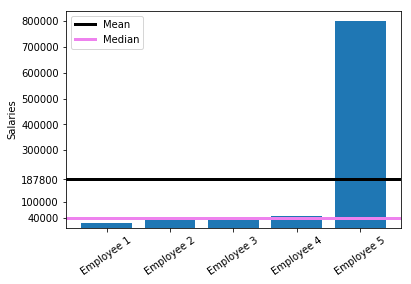



**Exercise**

- The `Lot Area` and `SalePrice` variables have outliers. Confirm this information by visualizing the distributions using the `Series.plot.box()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html)

- Compute the median and the mean for each of the two variables.
- Because the variables are numerical, we can use the `Series.median()` method and the `Series.mean()` method.
- For each variable, compute the difference between the mean and the median. 
- Assign the difference for the `Lot Area` column to a variable named `lotarea_difference`.
- Assign the difference for the `SalePrice` column to a variable named `saleprice_difference`.
- Inspect the differences.

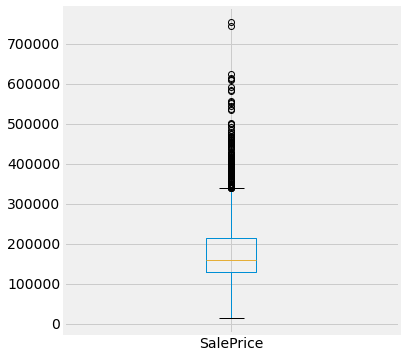

<function matplotlib.pyplot.show(*args, **kw)>

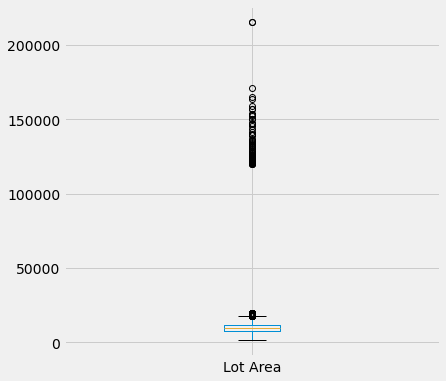

In [12]:
fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
houses.SalePrice.plot.box()
plt.show()

fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
houses['Lot Area'].plot.box()
plt.show

In [13]:
# Difference of mean and median SalePrice
mean_price = houses['SalePrice'].mean()
median_price = houses['SalePrice'].median()
saleprice_difference = mean_price - median_price
saleprice_difference

20796.060068259394

In [14]:
# Difference of mean and median Lot Area
mean_price = houses['Lot Area'].mean()
median_price = houses['Lot Area'].median()
lotarea_difference = mean_price - median_price
lotarea_difference

3680.7051194539254

### The Median for Ordinal Scale

Data points belonging to ordinal variables are often coded using numbers. Consider the frequency distribution of the Overall Cond variable, which rates the overall condition of a house. Each numerical value corresponds to a specific condition from 'very poor' to 'very excellent'.

Because words like "fair" or "average" are coded with numbers, it becomes mathematically possible to compute the mean. But whether or not it's theoretically sound to compute the mean for ordinal variables is contentious.

In [15]:
print(houses['Overall Cond'].value_counts().sort_index())

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64


If two data points are measured on an ordinal scale and there's a difference between them, we can tell the direction of the difference, but we don't know the size of the difference.
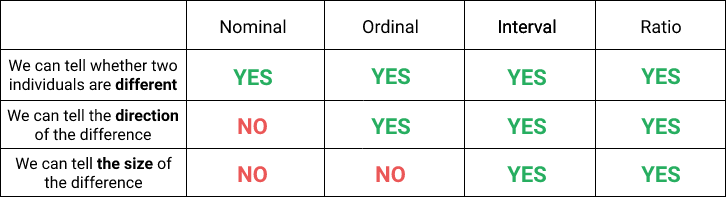

If the overall condition of a house is rated with an 8 (Excellent), and another house gets a 4 (Below average), we can't say that the conditions of the former are twice as better than the latter. The most we can say is that the house which got an 8 has better conditions (we can't quantify how much better — it could be twice as better, three times as better, 1.5 times as better, we simply don't know).

It can be argued thus that the numerical values of an ordinal variable are not subject to meaningful arithmetical operations. But computing the mean involves meaningful arithmetical operations, so it's not theoretically sound to use the mean for ordinal variables.

Because the median doesn't involve arithmetical operations, it's considered a better alternative to the mean. This doesn't fully apply, however, to even-numbered distributions, where we need to take the mean of the middle two values to find the median.

**Exercise**

Find the mean and the median of the `Overall Cond` variable.

- Assign the mean to a variable named `mean`.
- Assign the median to a variable named `median`.
- Plot a histogram to visualize the distribution of the `Overall Cond variable` and determine that between the mean and the median, which one describes better the shape of the histogram.

mean:  5.563139931740614
median:  5.0


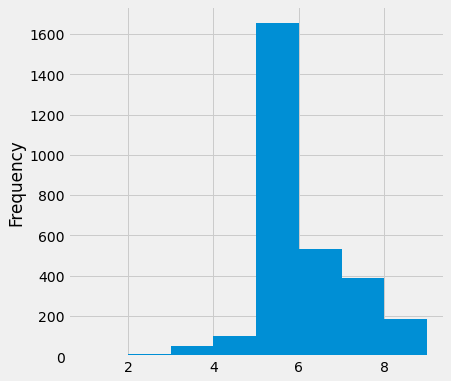

In [16]:
mean = houses['Overall Cond'].mean()
print('mean: ', mean)

median = houses['Overall Cond'].median()
print('median: ', median)

fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
houses['Overall Cond'].plot.hist(bins = 8)
plt.show()

Above, the mean appears more representative because it captures the fact that there are more houses rated above 5 than rated under 5. Because of this, the mean is slightly shifted above 5.

### Sensitivity to Changes

Although it can be argued that it's theoretically unsound to compute the mean for ordinal variables, in the last exercise we found the mean more informative and representative than the median. The truth is that in practice many people get past the theoretical hurdles and use the mean nonetheless because in many cases it's much richer in information than the median.

Let's consider a situation where the mean is arguably a much better choice to measure the average of an ordinal variable. Let's say we're working for an online real estate company which allows customers to buy, sell, and rent houses. The speed on our website is important for all of our customers, and we want to measure how the customers perceive the speed on the website.

We sample randomly 10 customers and have them assess the following sentence: "The website is very fast, usually a new page loads in less than a second". The customers can choose between the following answers, which we plan to code under the hood with numbers between 1 and 5:

Code	Answer
1	Strongly disagree
2	Disagree
3	Neither agree nor disagree
4	Agree
5	Strongly agree

The survey yielded the distribution below, whose mean and median have both a value of 2:
$\begin{equation}
[1, 1, 1, 2, 2, 2, 2, 3, 3, 3]
\end{equation}$

After being presented with the results, the engineering team implemented a few changes meant to improve speed, and now we repeat the survey on another random sample of 10 customers and get these results:
$\begin{equation}
[1, 2, 2, 2, 2, 2, 4, 5, 5, 5]
\end{equation}$

The median is still 2, and it suggests that nothing changed. The mean, however, went up to 3, suggesting that the changes our engineers made have had a positive effect. Unlike the median, the mean is sensitive to small changes in the data, and this property is what makes it more useful in this case.

It should be clear by now that whether we should use the mean for ordinal data is contentious. In practice, we should be flexible and make our choice on a case by case basis. Also, we are not constrained to choose one metric or the other — we can choose both the mean and median to describe a distribution.
